In [1]:
import pandas as pd
import numpy as np

#Imports to enable visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Python standard libraries
import glob, os    
import datetime

In [2]:
#Functions

def read_df_from_csv_folder(folderpath,filename_pattern):
    result = pd.DataFrame()
    files_to_be_read = glob.glob(os.path.join(folderpath, filename_pattern))
    for i in xrange(len(files_to_be_read)):
        try:
            df = pd.read_csv(files_to_be_read[i])
            result = result.append(df)
        except Exception as e:
            pass
    return result


### Read Data

In [87]:
#base_folderpath = '/local/tarciso/masters/experiments/preliminary-exp/preliminary-exp-sample-data/buste-v3a/'
base_folderpath = '/local/tarciso/masters/data/trips-optimality-exp/test//'
#base_folderpath = '/local/tarciso/data/'

#### Trips Improvement Capacity Data

In [88]:
#imp_cap_df = read_df_from_csv_folder(base_folderpath + '/duration_improvement_capacity/', 'part-*.csv')
imp_cap_df = read_df_from_csv_folder(base_folderpath + '/duration_improvement_capacity/', 'part-*.csv')
#imp_cap_df = pd.read_csv(base_folderpath + '/result.csv')

In [89]:
imp_cap_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2858 entries, 0 to 1
Data columns (total 11 columns):
date                 2858 non-null object
user_trip_id         2858 non-null int64
cardNum              2858 non-null int64
birthdate            637 non-null object
gender               637 non-null object
exec_start_time      2858 non-null object
executed_duration    2858 non-null float64
itinerary_id         2858 non-null int64
duration             2858 non-null float64
alt_start_time       2858 non-null object
imp_capacity         2858 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 267.9+ KB


In [90]:
imp_cap_df.head()

,date,user_trip_id,cardNum,birthdate,gender,exec_start_time,executed_duration,itinerary_id,duration,alt_start_time,imp_capacity
0,2017-04-30,403726925909,3682118,NaN,NaN,2017-04-30 01:08:51,674.300000,0,674.300000,2017-04-30 01:08:51,0.0
1,2017-04-30,712964571226,10005641,NaN,NaN,2017-04-30 14:39:39,8.416667,0,8.416667,2017-04-30 14:39:39,0.0
2,2017-04-30,1468878815312,3201587,NaN,NaN,2017-04-30 13:27:21,4.666667,0,4.666667,2017-04-30 13:27:21,0.0
0,2017-05-07,146028888068,3737896,NaN,NaN,2017-05-07 08:45:08,1.150000,0,1.150000,2017-05-07 08:45:08,0.0
1,2017-05-07,927712935963,3680105,NaN,NaN,2017-05-07 07:54:18,65.433333,0,65.433333,2017-05-07 07:54:18,0.0


In [91]:
imp_cap_df[imp_cap_df['itinerary_id'] != 0].count()[0]/float(imp_cap_df.count()[0])

0.30300909727081876

In [92]:
imp_cap_df.count()

date                 2858
user_trip_id         2858
cardNum              2858
birthdate             637
gender                637
exec_start_time      2858
executed_duration    2858
itinerary_id         2858
duration             2858
alt_start_time       2858
imp_capacity         2858
dtype: int64

#### Trips Itinerary Data

In [93]:
#trips_itineraries = read_df_from_csv_folder(base_folderpath + '/trips_actual_itineraries/','part-*.csv')

In [94]:
#trips_itineraries.columns

In [95]:
#trips_itineraries.describe()

In [96]:
#trips_itineraries.head(10)

### Preparing Data

#### Computing Improvement Capacity as a Percentage to avoid value magnitude bias

In [97]:
imp_cap_df['imp_capacity_perc'] = imp_cap_df['imp_capacity'] / imp_cap_df['executed_duration']

In [98]:
imp_cap_df.head(10)

,date,user_trip_id,cardNum,birthdate,gender,exec_start_time,executed_duration,itinerary_id,duration,alt_start_time,imp_capacity,imp_capacity_perc
0,2017-04-30,403726925909,3682118,NaN,NaN,2017-04-30 01:08:51,674.300000,0,674.300000,2017-04-30 01:08:51,0.000000,0.000000
1,2017-04-30,712964571226,10005641,NaN,NaN,2017-04-30 14:39:39,8.416667,0,8.416667,2017-04-30 14:39:39,0.000000,0.000000
2,2017-04-30,1468878815312,3201587,NaN,NaN,2017-04-30 13:27:21,4.666667,0,4.666667,2017-04-30 13:27:21,0.000000,0.000000
0,2017-05-07,146028888068,3737896,NaN,NaN,2017-05-07 08:45:08,1.150000,0,1.150000,2017-05-07 08:45:08,0.000000,0.000000
1,2017-05-07,927712935963,3680105,NaN,NaN,2017-05-07 07:54:18,65.433333,0,65.433333,2017-05-07 07:54:18,0.000000,0.000000
0,2017-04-30,146028888073,960305,NaN,NaN,2017-04-30 12:10:26,94.950000,0,94.950000,2017-04-30 12:10:26,0.000000,0.000000
1,2017-04-30,163208757292,3033204,NaN,NaN,2017-04-30 08:35:31,64.550000,0,64.550000,2017-04-30 08:35:31,0.000000,0.000000
2,2017-04-30,704374636598,3462516,18/11/84,M,2017-04-30 15:27:55,119.250000,1,23.016667,2017-04-30 15:25:55,96.233333,0.806988
3,2017-04-30,893353197642,3595584,NaN,NaN,2017-04-30 15:28:11,5.583333,0,5.583333,2017-04-30 15:28:11,0.000000,0.000000
0,2017-05-08,1082331758592,3484025,NaN,NaN,2017-05-08 06:19:22,358.833333,3,3.283333,2017-05-08 06:34:39,355.550000,0.990850


#### Computing hour of day and period of day for each trip

In [99]:
imp_cap_df['hour_of_day'] = pd.to_datetime(imp_cap_df['exec_start_time'], format='%Y-%m-%d %H:%M:%S').dt.hour

In [100]:
period_of_day_list = [('hour_of_day', [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]),
         ('period_of_day', ['very_late_night','very_late_night','very_late_night','very_late_night','early_morning','early_morning','early_morning','morning','morning','morning','morning','midday','midday','midday','afternoon','afternoon','afternoon','early_night','early_night','early_night','night','night','late_night','late_night'])]
period_of_day_df = pd.DataFrame.from_items(period_of_day_list)
period_of_day_df.period_of_day = period_of_day_df.period_of_day.astype('category', ordered=True)

period_of_day_df

imp_cap_df = imp_cap_df.merge(period_of_day_df, how='inner', on='hour_of_day')

imp_cap_df.head()

,date,user_trip_id,cardNum,birthdate,gender,exec_start_time,executed_duration,itinerary_id,duration,alt_start_time,imp_capacity,imp_capacity_perc,hour_of_day,period_of_day
0,2017-04-30,403726925909,3682118,NaN,NaN,2017-04-30 01:08:51,674.300000,0,674.300000,2017-04-30 01:08:51,0.0,0.0,1,very_late_night
1,2017-04-30,712964571226,10005641,NaN,NaN,2017-04-30 14:39:39,8.416667,0,8.416667,2017-04-30 14:39:39,0.0,0.0,14,afternoon
2,2017-05-07,601295421440,2483729,NaN,NaN,2017-05-07 14:43:11,1.300000,0,1.300000,2017-05-07 14:43:11,0.0,0.0,14,afternoon
3,2017-05-05,670014898204,2652348,NaN,NaN,2017-05-05 14:43:24,194.016667,0,194.016667,2017-05-05 14:43:24,0.0,0.0,14,afternoon
4,2017-05-07,472446402581,3804618,NaN,NaN,2017-05-07 14:03:01,290.833333,0,290.833333,2017-05-07 14:03:01,0.0,0.0,14,afternoon


#### Computing hour of day and period of day for each trip

In [101]:
def get_trip_len_bucket(trip_duration):
    if (trip_duration < 15):
        return '0_15'
    elif (trip_duration < 30):
        return '15_30'
    elif (trip_duration < 45):
        return '30_45'
    elif (trip_duration >= 45):
        return '45+'
    else:
        return 'NA'


imp_cap_df['trip_length_bucket'] = imp_cap_df['executed_duration'].apply(get_trip_len_bucket)

In [102]:
imp_cap_df.head(10)

,date,user_trip_id,cardNum,birthdate,gender,exec_start_time,executed_duration,itinerary_id,duration,alt_start_time,imp_capacity,imp_capacity_perc,hour_of_day,period_of_day,trip_length_bucket
0,2017-04-30,403726925909,3682118,NaN,NaN,2017-04-30 01:08:51,674.300000,0,674.300000,2017-04-30 01:08:51,0.000000,0.000000,1,very_late_night,45+
1,2017-04-30,712964571226,10005641,NaN,NaN,2017-04-30 14:39:39,8.416667,0,8.416667,2017-04-30 14:39:39,0.000000,0.000000,14,afternoon,0_15
2,2017-05-07,601295421440,2483729,NaN,NaN,2017-05-07 14:43:11,1.300000,0,1.300000,2017-05-07 14:43:11,0.000000,0.000000,14,afternoon,0_15
3,2017-05-05,670014898204,2652348,NaN,NaN,2017-05-05 14:43:24,194.016667,0,194.016667,2017-05-05 14:43:24,0.000000,0.000000,14,afternoon,45+
4,2017-05-07,472446402581,3804618,NaN,NaN,2017-05-07 14:03:01,290.833333,0,290.833333,2017-05-07 14:03:01,0.000000,0.000000,14,afternoon,45+
5,2017-05-07,755914244110,3774476,NaN,NaN,2017-05-07 14:30:07,32.483333,1,4.166667,2017-05-07 14:28:07,28.316667,0.871729,14,afternoon,30_45
6,2017-05-01,42949673035,2835698,NaN,NaN,2017-05-01 14:50:02,42.083333,2,16.783333,2017-05-01 15:03:10,25.300000,0.601188,14,afternoon,30_45
7,2017-05-05,592705486858,2931370,16/11/94,F,2017-05-05 14:32:53,1.433333,0,1.433333,2017-05-05 14:32:53,0.000000,0.000000,14,afternoon,0_15
8,2017-04-30,1322849927184,1794145,NaN,NaN,2017-04-30 14:32:10,22.400000,0,22.400000,2017-04-30 14:32:10,0.000000,0.000000,14,afternoon,15_30
9,2017-04-30,171798691886,3609739,22/09/78,F,2017-04-30 14:59:08,17.900000,1,11.566667,2017-04-30 14:57:08,6.333333,0.353818,14,afternoon,15_30


### Analyzing Data Distribution

### Improvement Capacity Percentage

#### Overall

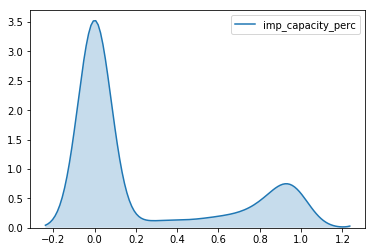

In [103]:
sns.kdeplot(imp_cap_df.imp_capacity_perc, shade=True)

In [104]:
imp_cap_df.imp_capacity_perc.describe()

count    2858.000000
mean        0.227211
std         0.373718
min         0.000000
25%         0.000000
50%         0.000000
75%         0.495499
max         0.997969
Name: imp_capacity_perc, dtype: float64

#### Removing outliers (lower/higher 5%)

In [105]:
fith_perc = np.percentile(imp_cap_df.imp_capacity_perc,5)
ninety_fith_perc = np.percentile(imp_cap_df.imp_capacity_perc,95)

print fith_perc, ninety_fith_perc

0.0 0.97027847871


In [106]:
filtered_imp_cap_df = imp_cap_df[(imp_cap_df.imp_capacity_perc > fith_perc) & (imp_cap_df.imp_capacity_perc < ninety_fith_perc)].copy()

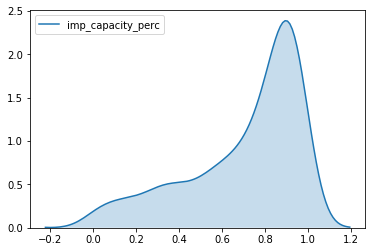

In [107]:
sns.kdeplot(filtered_imp_cap_df.imp_capacity_perc, shade=True)

In [108]:
filtered_imp_cap_df.imp_capacity_perc.describe()

count    722.000000
mean       0.704411
std        0.262558
min        0.001749
25%        0.554128
50%        0.810138
75%        0.909568
max        0.970235
Name: imp_capacity_perc, dtype: float64

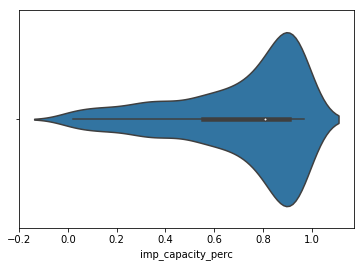

In [109]:
sns.violinplot(x=filtered_imp_cap_df.imp_capacity_perc)

#### Per trip length 

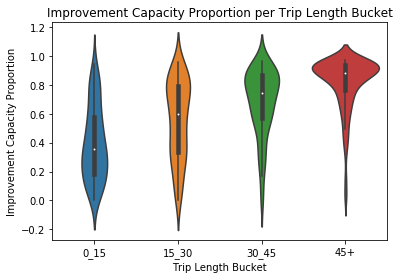

In [110]:
trip_len_order=['0_15','15_30','30_45','45+']
ax = sns.violinplot(x='trip_length_bucket',y='imp_capacity_perc', data=filtered_imp_cap_df, order=trip_len_order)
ax.set(xlabel='Trip Length Bucket',ylabel='Improvement Capacity Proportion',title='Improvement Capacity Proportion per Trip Length Bucket')
plt.show()

#### Per hour of day

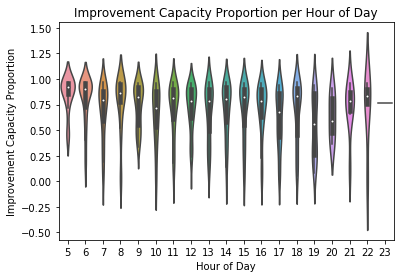

In [111]:
ax = sns.violinplot(x='hour_of_day',y='imp_capacity_perc', data=filtered_imp_cap_df)
ax.set(xlabel='Hour of Day',ylabel='Improvement Capacity Proportion',title='Improvement Capacity Proportion per Hour of Day')
plt.show()

#### Per period of day

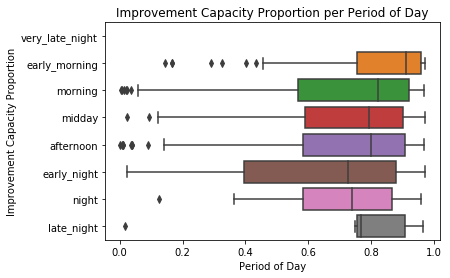

In [112]:
period_of_day_order = ['very_late_night','early_morning','morning','midday','afternoon','early_night','night','late_night']
ax = sns.boxplot(x='imp_capacity_perc',y='period_of_day', data=filtered_imp_cap_df, order=period_of_day_order)
ax.set(xlabel='Period of Day',ylabel='Improvement Capacity Proportion',title='Improvement Capacity Proportion per Period of Day')
plt.show()

#### Per trip length and Period of Day

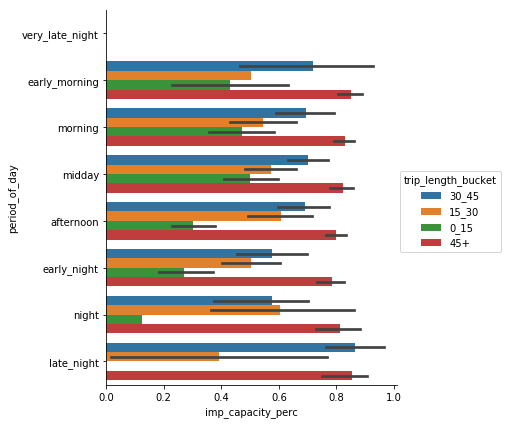

In [113]:
col_order = ['very_late_night','early_morning','morning','midday','afternoon','early_night','night','late_night']
sns.factorplot(x='imp_capacity_perc',y='period_of_day',hue='trip_length_bucket', data=filtered_imp_cap_df, kind='bar', size=6, order=col_order)

#### Per Day of Week (Sun-Sat)

#### Per Day Type (Mon,Fri,Tue-Thu,Sat-Sun)